<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/KERAS_AND_TENSORFLOW_IMAGE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:


!pip install tensorflow


In [42]:
import tensorflow as tf
from tensorflow import keras

In [4]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


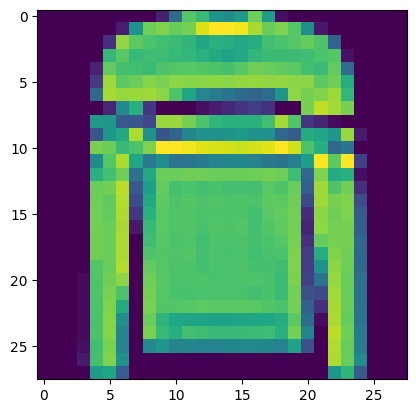

In [5]:
plt.imshow(X_train_full[5])

In [6]:
y_train_full[1]

0

In [7]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(class_names)


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 3.2120 - accuracy: 0.6813
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7043 - accuracy: 0.7208
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6220 - accuracy: 0.7492
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5598 - accuracy: 0.7959
Epoch 5/5
1/1 [==============================] - 0s 110ms/step


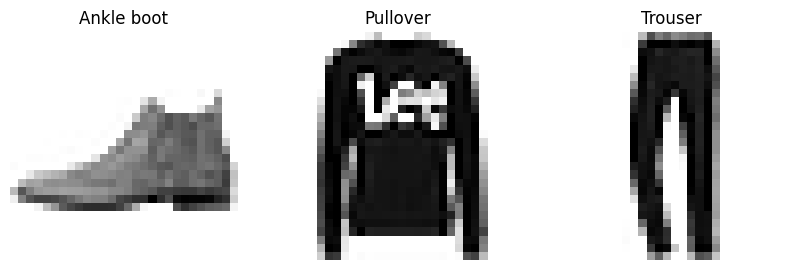

In [8]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_full, y_train_full, epochs=5)

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_new[i], cmap="binary")
    plt.title(class_names[y_pred[i]])
    plt.axis('off')
plt.show()


In [9]:


print(f"Accuracy: {model.evaluate(X_test, y_test)[1]:.2%}")


313/313 [==============================] - 1s 3ms/step - loss: 0.5857 - accuracy: 0.7998
Accuracy: 79.98%


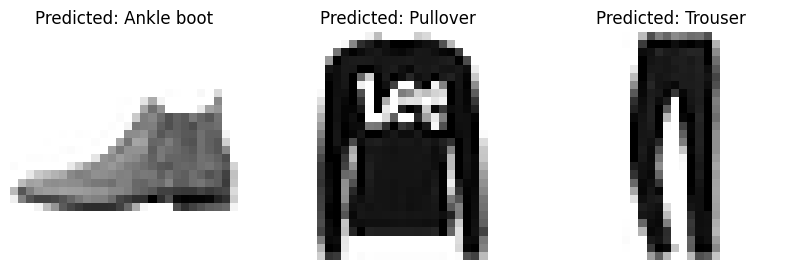

In [10]:

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_test[i], cmap="binary")
    plt.title(f"Predicted: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.show()


In [11]:
X_train_n = X_train_full / 255.
X_train_n = X_train_full / 255.

In [12]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_train_n

In [14]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))




In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
import pydot

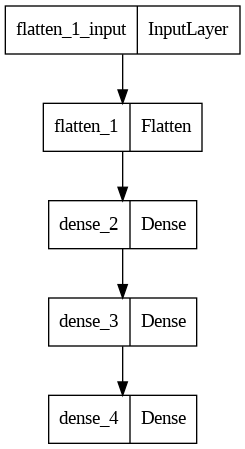

In [23]:
keras.utils.plot_model(model)

In [24]:
weights, baises = model.layers[1].get_weights()

In [25]:
weights

array([[ 0.00374185,  0.0092857 , -0.07362087, ...,  0.00294247,
        -0.03399045, -0.07081134],
       [ 0.00532856,  0.01262408,  0.07289642, ...,  0.02725444,
         0.0620247 ,  0.03192078],
       [ 0.04299036, -0.06403392, -0.02615046, ..., -0.01569552,
         0.06709267, -0.01952979],
       ...,
       [ 0.05371535, -0.01141014,  0.01745288, ..., -0.03451886,
         0.01207859,  0.02016645],
       [ 0.01938902, -0.02210718, -0.02372912, ...,  0.05356714,
         0.00633693,  0.01040238],
       [-0.0414515 , -0.06624748, -0.06898113, ..., -0.05457627,
         0.0433651 , -0.03866212]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
baises

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
baises.shape

(300,)

In [29]:
model.compile(loss="sparse_catogorical_corrsentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
!pip install tensorflow

In [38]:
import tensorflow as tf

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [46]:
# Assuming you have defined and compiled your model before
# model = ...

# Train the model
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4845 - accuracy: 0.8250 - val_loss: 0.3635 - val_accuracy: 0.8694
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3617 - accuracy: 0.8668 - val_loss: 0.3944 - val_accuracy: 0.8612
Epoch 3/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3288 - accuracy: 0.8789 - val_loss: 0.3201 - val_accuracy: 0.8820
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3043 - accuracy: 0.8866 - val_loss: 0.3137 - val_accuracy: 0.8884
Epoch 5/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2852 - accuracy: 0.8927 - val_loss: 0.3029 - val_accuracy: 0.8824
Epoch 6/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2704 - accuracy: 0.8998 - val_loss: 0.3252 - val_accuracy: 0.8856
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2581 - accuracy: 0.9036 - val_loss: 0.3071 - val_ac

In [47]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [48]:
model_history.history

{'loss': [0.4844951629638672,
  0.36166611313819885,
  0.32876935601234436,
  0.30432605743408203,
  0.28520622849464417,
  0.27044376730918884,
  0.2580857276916504,
  0.24832284450531006,
  0.23795844614505768,
  0.22860926389694214,
  0.21783886849880219,
  0.21169228851795197,
  0.20329847931861877,
  0.1968955099582672,
  0.18891093134880066,
  0.18528695404529572,
  0.1772005707025528,
  0.17382940649986267,
  0.16860918700695038,
  0.16379307210445404,
  0.15795966982841492,
  0.1522330790758133,
  0.15032552182674408,
  0.14589349925518036,
  0.1401478350162506,
  0.13776206970214844,
  0.1313266158103943,
  0.13613301515579224,
  0.1270732283592224,
  0.12586824595928192],
 'accuracy': [0.8249636292457581,
  0.8667636513710022,
  0.8788909316062927,
  0.8866181969642639,
  0.892690896987915,
  0.8997636437416077,
  0.9036181569099426,
  0.9061272740364075,
  0.9090181589126587,
  0.9141272902488708,
  0.9172182083129883,
  0.9190727472305298,
  0.9230181574821472,
  0.92479997

AttributeError: 'Axes' object has no attribute 'set_ylin'

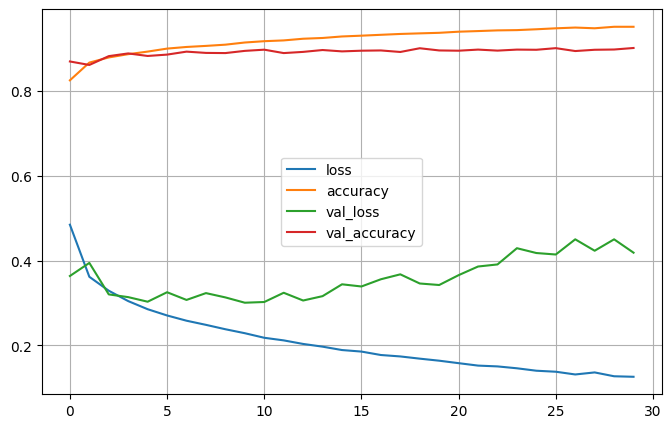

In [49]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylin(0,1)
plt.show()

In [51]:
X_test = X_test[:10000]
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 37.1288 - accuracy: 0.1019


[37.12876892089844, 0.10189999639987946]

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 37.1288 - accuracy: 0.1019


[37.12876892089844, 0.10189999639987946]

In [53]:
X_new = X_test[:3]

In [54]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 71ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 27ms/step


In [59]:
y_pred_prob = model.predict(X_new)

# Get predicted classes
y_pred = np.argmax(y_pred_prob, axis=1)

1/1 [==============================] - 0s 28ms/step


In [62]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

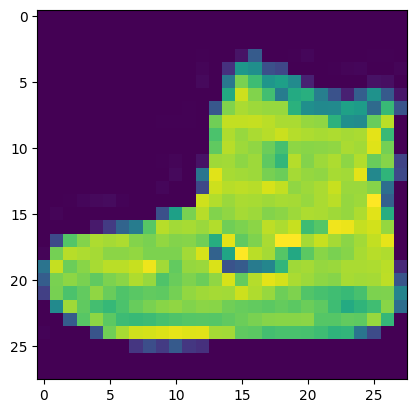

In [63]:
plt.imshow(X_test[0])

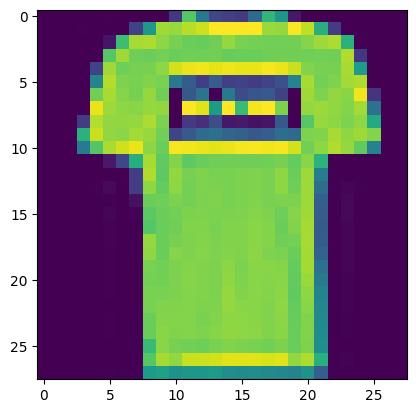

In [64]:
plt.imshow(X_test[1])

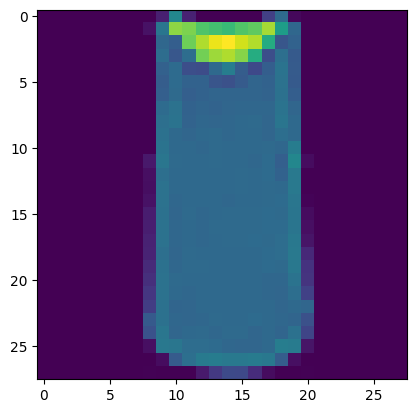

In [65]:
plt.imshow(X_test[2])

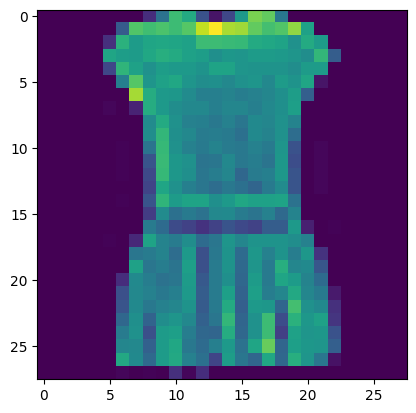

In [66]:
plt.imshow(X_test[3])